# Data analysis 
(New Replacement)

<br>
Qidu Fu
<br>
3/14/2025
<br>
<br>

**Contents**
- [0 Load data](#0-load-data)
- [1 Detect code-switching](#1-detect-code-switching)
    - [1.1 Experiment with regex](#11-experiment-with-regex)
    - [1.2 Experiment with langdetect](#12-experiment-with-the-library-langdetect)
    - [1.3 Experiment with langid](#13-experiment-with-the-library-langid)
    - [1.4 Apply code-switching detection](#14-apply-code-switching-detection)
- [2 Conduct topic modeling](#2-conduct-topic-modeling-to-aggregatecluster-the-topics)
    - [2.1 Use K-Means](#21-use-k-means)
    - [2.2 Use LDA](#22-use-lda)
    - [2.3 Use WordCloud](#23-use-wordcloud-to-visualize-the-clusters)
    - [2.4 Apply topic modeling](#24-apply-topic-modeling-assign-topics)
- [3 Analyze the topic distribution](#3-analyze-the-topic-distribution-exploratory-analysis)

## 0 Load data

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

RANDOM_STATE = 100

In [104]:
STACK_DF = pd.read_csv('private/stack_exchange_cleaned.csv')
STACK_DF.head()

,text,topic
0,My translation of Li Bai's 《三五七言》,"translation, poetry"
1,What do these characters on an antique mural p...,"character identification, traditional characte..."
2,Help in translating Li Bai's 《月下独酌·其二》,"translation, poetry"
3,purpose of using 了 with 要不,grammar
4,Why does the character 的 is pronounced differe...,"pronunciation, songs"


In [105]:
STACK_DF.sample(20)

,text,topic
1598,Trying to translate signature and stamp for Ch...,"translation, character identification, seal, h..."
9853,How do I answer 这是哪儿?,meaning
3870,The exact meaning of 就 as a linking word,"word, conjunction"
2786,Are these sentences interchangeable?,"grammar, sentence structure"
5768,Which one is correct? “犯賤” or “泛賤”?,meaning in context
1670,How to literally translate this 就是一进街口靠墙的一个小棚子?,"translation, sentence structure"
605,"The language function of ""很"" as non-adverb","translation, adverbs, ambiguity"
10020,Cantonese slang - What does 'Primary Chicken' ...,"cantonese, topolect, slang"
10089,"Proper translation of "" 倒页、脱页""？",translation
830,Help to identify author please,art


In [106]:
STACK_DF.iloc[160, ]

text     Chinese bronze dagger inscriptions
topic      meaning, characters, calligraphy
Name: 160, dtype: object

In [107]:
STACK_DF.iloc[10498, ]

text     不得不, 必须, 只好, 应该: what's the difference?
topic                      word choice, mandarin
Name: 10498, dtype: object

In [108]:
sample_idx = np.random.choice(STACK_DF.index, 25, replace=False)
STACK_DF.loc[sample_idx, 'text']

11610              Dot vs. slash in Chinese computer fonts
10083                          What is the negative of 将会？
6943                                 Words order: 我们两个是好朋友
1873     How does Chinese handle the -ing and -ed in co...
8606                How do Chinese people call each other?
276      I'm currently reading a romanized, english map...
11197          When and why is right to left writing used?
3095     Is it just me or is 却向人类早已认定为准则的定义提出了质疑 terrib...
452      Can someone please help me by translating this...
2920     Are languages such as Wu, Yue, Jin, Min, Hakka...
10549                               Hanzi Underline Rules?
8759                How to ask someone "Will you marry me"
706                      Teochew dialect in Southern China
11367                         Difference between 换钱 and 挽钱
6583                            Why is it 出差去 and not 去出差?
1594                                  What does "绝地" mean?
9595                    Loanwords with Chinese Equivalen

## 1 Detect code-switching
- Using regex to detect code-switching sentences, which produce to consistent results, through human checking (the author) of a 300-records of sample data
- However, using langdetect, the library, does not produce accuracy results; therefore, it is not  used. 
- Similar to langdetect, langid does not produce accurate results; therefore, it is not used. These libraries work well with long text; however, the posts are short. This may explain the reason.
- Apply the regex to detect the CS. 

### 1.1 Experiment with regex

In [109]:
def detect_code_switching_regex(text):
    """
    Detects code-switching between Chinese and English in the provided text.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese characters and English letters are found in the text, 
            False otherwise.
    """
    contains_chinese = bool(re.search(r'[\u4e00-\u9fff]', text))
    contains_english = bool(re.search(r'[a-zA-Z]', text))
    return contains_chinese and contains_english

STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_regex)

11610    False
10083     True
6943      True
1873     False
8606     False
276      False
11197    False
3095      True
452      False
2920     False
10549    False
8759     False
706      False
11367     True
6583      True
1594      True
9595     False
1499      True
7012     False
283       True
8103     False
8973      True
8150     False
1489      True
4966      True
Name: text, dtype: bool

### 1.2 Experiment with the library langdetect 

In [110]:
# Install langdetect
# !pip3 install langdetect

In [111]:
from langdetect import detect_langs

def detect_code_switching_langdetect(text):
    """
    Detects code-switching between Chinese and English in the provided text using the langdetect library.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese ('zh-cn') and English ('en') are detected in the text, False otherwise.
    """
    try:
        # Detect languages in the text
        langs = detect_langs(text)
        # Extract language codes
        lang_codes = [lang.lang for lang in langs]
        # Check if both Chinese and English are present
        return 'zh-cn' in lang_codes and 'en' in lang_codes
    except Exception as e:
        # Return False if an error occurs (e.g., invalid text format)
        return False

print('abd 我爱你: ', detect_code_switching_langdetect('abd 我爱你'))
STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_langdetect)

abd 我爱你:  False


11610    False
10083    False
6943     False
1873     False
8606     False
276      False
11197    False
3095     False
452      False
2920     False
10549    False
8759     False
706      False
11367    False
6583     False
1594     False
9595     False
1499     False
7012     False
283      False
8103     False
8973     False
8150     False
1489     False
4966     False
Name: text, dtype: bool

### 1.3 Experiment with the library: langid

In [112]:
# Install library
# !pip3 install langid


In [113]:
import langid

def detect_code_switching_langid(text):
    """
    Detects code-switching between Chinese and English in the provided text using langid.
    
    Parameters:
    text (str): The input text in which code-switching is to be detected.
    
    Returns:
    bool: True if both Chinese ('zh') and English ('en') are detected in the text, False otherwise.
    """
    try:
        # Classify the text to detect language
        detected_languages = langid.classify(text)  # returns a tuple: (language_code, probability)
        detected_lang_code = detected_languages[0]

        # Check if both Chinese and English are detected
        if 'zh' in detected_lang_code and 'en' in detected_lang_code:
            return True
        else:
            return False
    except Exception as e:
        # Return False if an error occurs
        return False

# Apply the function to your DataFrame
STACK_DF.loc[sample_idx, 'text'].apply(detect_code_switching_langid)


11610    False
10083    False
6943     False
1873     False
8606     False
276      False
11197    False
3095     False
452      False
2920     False
10549    False
8759     False
706      False
11367    False
6583     False
1594     False
9595     False
1499     False
7012     False
283      False
8103     False
8973     False
8150     False
1489     False
4966     False
Name: text, dtype: bool

### 1.4 Apply code-switching detection

In [114]:
STACK_DF['code_switching'] = STACK_DF['text'].apply(detect_code_switching_regex)
STACK_DF.sample(10)

,text,topic,code_switching
4136,"What semantic notions underlie 'hem, margin; r...",etymology,True
7209,What is the function of 便 here? And what does ...,"translation, grammar, idioms",True
6799,What derogatory terms are there for Chinese pe...,"mandarin, word requests",False
4587,"When using 是...的, what should I do when there ...",grammar,True
46,Sequence of Chinese characters for keeping tra...,"characters, simplified characters, traditional...",False
9993,Is 察颜观色 or 察言观色 the correct term to use?,chengyu,True
1347,How can I search for a Chinese character when ...,"characters, character identification",False
319,"I'm confused with composite direction verbs, h...","grammar, difference",False
4751,Could you please correct my sentences?,"grammar, vocabulary, writing critique",False
9573,"Is ""Year of the Goat/Ram/Sheep"" due to the Chi...",translation,False


In [115]:
# Rearrange the columns
STACK_DF = STACK_DF[['text', 'code_switching', 'topic']]
STACK_DF.head()

,text,code_switching,topic
0,My translation of Li Bai's 《三五七言》,True,"translation, poetry"
1,What do these characters on an antique mural p...,False,"character identification, traditional characte..."
2,Help in translating Li Bai's 《月下独酌·其二》,True,"translation, poetry"
3,purpose of using 了 with 要不,True,grammar
4,Why does the character 的 is pronounced differe...,True,"pronunciation, songs"


## 2. Conduct topic modeling to aggregate/cluster the topics
As mentioned in the previous Jupyter Notebook, the original topics were more than 3000 using value counts. Therefore, further aggregation/clustering is needed. 
Based on the K-Means, I decided 6 topics might work the best. Using 6 topics with LDA mode, I interpreted and categorized the text into the following six categories/topics/domains (according to LDA):
<br>

0) word choice, phrase, sentence structure
1) idioms
2) grammar, meaning
3) Mandarin, character
4) characters, synonyms, topolects
5) differences: writing, speech


### 2.1 Use K-Means

- Based on KMeans' inertia plot, 6 clusters may be used.

In [116]:
STACK_DF.topic.value_counts()

translation                                                            974
grammar                                                                601
meaning                                                                464
meaning in context                                                     238
word choice                                                            217
                                                                      ... 
terms of address, formal                                                 1
meaning in context, etymology, character identification                  1
idioms, colloquialisms                                                   1
character identification, traditional characters, seal, old chinese      1
translation, style                                                       1
Name: topic, Length: 3502, dtype: int64

In [117]:
# Use Kmeans clustering to find the optimal number of clusters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

def topic_model_kmeans(vectorizer, n_clusters=5):
    """
    Creates a KMeans clustering model pipeline using a given vectorizer.

    Parameters:
    vectorizer (object): A vectorizer (e.g., TfidfVectorizer) to be used in the pipeline.
    n_clusters (int): The number of clusters to form. Default is 5.

    Returns:
    pipeline: A scikit-learn pipeline with the provided vectorizer and KMeans model.
    """
    kmeans = KMeans(n_clusters=n_clusters)
    # Create a pipeline with the provided vectorizer and KMeans model
    pipeline = make_pipeline(vectorizer, kmeans)
    return pipeline

In [118]:
def plot_inertia(STACK_DF, pipeline, max_clusters=10, random_state=RANDOM_STATE):
    """
    Plots the inertia for different numbers of clusters to help identify the optimal number.

    Parameters:
    STACK_DF (DataFrame): The input DataFrame containing text data in the 'topic' column.
    pipeline (object): A scikit-learn pipeline to be used for fitting the data.
    max_clusters (int): The maximum number of clusters to test. Default is 10.

    Returns:
    None: This function only generates and displays a plot of inertia values.
    """
    inertia = []  # List to store inertia values
    
    # Loop through different numbers of clusters
    for n in range(1, max_clusters + 1):
        # Update the pipeline with the current number of clusters
        pipeline.set_params(kmeans__n_clusters=n, 
                                kmeans__random_state=random_state)
        
        # Fit the pipeline to the data
        pipeline.fit(STACK_DF['topic'])
        
        # Get the KMeans model from the pipeline
        kmeans = pipeline.named_steps['kmeans']
        
        # Append the inertia value for the current model
        inertia.append(kmeans.inertia_)
    
    # Plot inertia to visualize the optimal number of clusters
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('KMeans Inertia')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

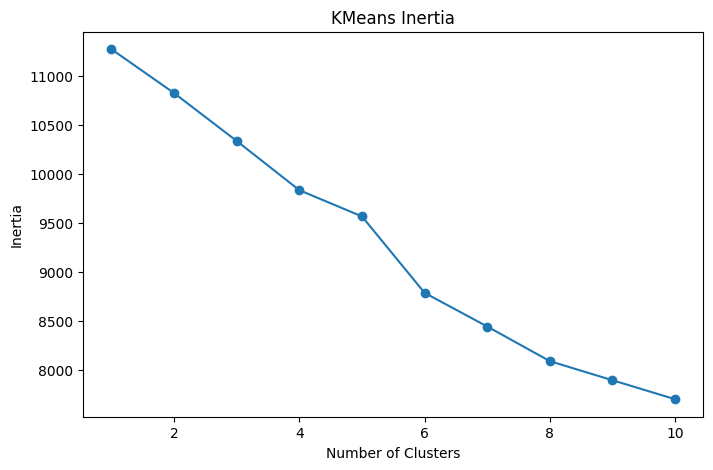

In [119]:
import nltk
# Define a vectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words=None, 
                                ngram_range=(1, 2), 
                                tokenizer=nltk.word_tokenize,
                                token_pattern=None)

# Create a pipeline with the vectorizer
kmeans_pipeline = topic_model_kmeans(vectorizer)

# Test with a random sample from your DataFrame
# sample_idx = np.random.choice(STACK_DF.index, 300, replace=False)
plot_inertia(STACK_DF, kmeans_pipeline, max_clusters=10)

In [120]:
# Retrain the model with the optimal number of clusters: 6
kmeans_pipeline.set_params(kmeans__n_clusters=6, 
                            kmeans__random_state=RANDOM_STATE)
kmeans_pipeline.fit(STACK_DF['topic'])

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 token_pattern=None,
                                 tokenizer=<function word_tokenize at 0x30bfc8820>)),
                ('kmeans', KMeans(n_clusters=6, random_state=100))])

In [121]:
def get_top_keywords(pipeline, n_terms=10):
    """
    Extracts the top keywords for each cluster in a KMeans model.
    
    Parameters:
    pipeline (Pipeline): A trained scikit-learn pipeline containing a TfidfVectorizer and KMeans model.
    n_terms (int): The number of top words to extract per cluster.
    
    Returns:
    DataFrame: A DataFrame showing the top keywords for each cluster.
    """
    # Extract the vectorizer and KMeans model from the pipeline
    vectorizer = pipeline.named_steps['tfidfvectorizer']
    kmeans = pipeline.named_steps['kmeans']
    
    # Get feature names (words) from the TF-IDF vectorizer
    feature_names = np.array(vectorizer.get_feature_names_out())
    
    # Identify the top words for each cluster
    top_keywords = []
    for cluster in range(kmeans.n_clusters):
        # Get indices of top TF-IDF words in the cluster centroid
        top_indices = kmeans.cluster_centers_[cluster].argsort()[-n_terms:][::-1]
        top_words = feature_names[top_indices]
        top_keywords.append(top_words)
    
    # Create a DataFrame for better visualization
    topic_df = pd.DataFrame(top_keywords, 
                            index=[f"Cluster {i}" for i in range(kmeans.n_clusters)], 
                            columns=[f"Word {i+1}" for i in range(n_terms)])
    
    return topic_df

# Run the function to get top words per cluster
kmeans_top_words_df = get_top_keywords(kmeans_pipeline, n_terms=20)
kmeans_top_words_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Word 20
Cluster 0,",",word,difference,word choice,choice,vocabulary,usage,etymology,"translation ,",", word",pronunciation,"meaning ,",mandarin,translation,meaning,"choice ,",", difference","grammar ,","mandarin ,",grammar
Cluster 1,meaning,meaning in,context,in,in context,", meaning",",","context ,","translation ,","meaning ,",translation,"grammar ,",grammar,word,"usage ,",", word",usage,", phrase",phrase,"choice ,"
Cluster 2,identification,character identification,character,", character","identification ,",",",", seal",seal,"translation ,",translation,characters,"characters ,","seal ,",", calligraphy",calligraphy,"meaning ,",meaning,", characters",", meaning",traditional characters
Cluster 3,grammar,"grammar ,",",",", grammar","translation ,",", usage",usage,translation,", sentence",", particles",", mandarin",sentence,particles,sentence structure,structure,mandarin,", meaning",", vocabulary",vocabulary,meaning
Cluster 4,characters,"characters ,",",",simplified,simplified characters,traditional,", characters",traditional characters,", simplified",", traditional","translation ,",translation,", etymology",", glyph","meaning ,",etymology,origin,glyph,glyph origin,"mandarin ,"
Cluster 5,translation,art,", 了",abbreviations,academic,"academic ,",accent,address,"address ,",adjectives,"adjectives ,",adverbs,"adverbs ,",ambiguity,"ambiguity ,",antonyms,了,", zhuyin",audio,"audio ,"


### 2.2 Use LDA
Based on KMeans, 6 topics may be good. Therefore, 6 topics are used in the LDA model training.

In [122]:
# Use LDA for topic modeling
from sklearn.decomposition import LatentDirichletAllocation

def topic_model_lda(vectorizer, n_topics=5, random_state=RANDOM_STATE):
    """
    Creates an LDA topic modeling pipeline using a given vectorizer.

    Parameters:
    vectorizer (object): A vectorizer (e.g., TfidfVectorizer) to be used in the pipeline.
    n_topics (int): The number of topics to generate. Default is 5.

    Returns:
    pipeline: A scikit-learn pipeline with the provided vectorizer and LDA model.
    """
    lda = LatentDirichletAllocation(n_components=n_topics, 
                                        random_state=random_state)
    # Create a pipeline with the provided vectorizer and LDA model
    pipeline = make_pipeline(vectorizer, lda)
    return pipeline

lda_pipeline = topic_model_lda(vectorizer, n_topics=6)
lda_pipeline

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2),
                                 token_pattern=None,
                                 tokenizer=<function word_tokenize at 0x30bfc8820>)),
                ('latentdirichletallocation',
                 LatentDirichletAllocation(n_components=6, random_state=100))])

In [123]:
# Evaluate the LDA model
def get_and_display_topics(model, feature_names, n_top_words=10):
    """
    Displays the top words for each topic in an LDA model and returns a DataFrame.

    Parameters:
    model (object): A trained LDA model.
    feature_names (list): A list of words obtained from the vectorizer's get_feature_names() method.
    n_top_words (int): The number of top words to display for each topic. Default is 10.

    Returns:
    DataFrame: A DataFrame containing the top words for each topic.
    """
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
        message = f"Topic {topic_idx}: " + " ".join(top_words)
        print(message)
    
    # Create a DataFrame with the top words for each topic
    topics_df = pd.DataFrame(topics, columns=[f'Word {i+1}' for i in range(n_top_words)])
    return topics_df

# Fit the LDA model to the data
lda_pipeline.fit(STACK_DF.loc[sample_idx, 'topic'])

# Get the LDA model from the pipeline
lda_model = lda_pipeline.named_steps['latentdirichletallocation']

# Get the feature names from the vectorizer
lda_feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic and display them
lda_top_words_df = get_and_display_topics(lda_model, lda_feature_names, n_top_words=10)

# Display the DataFrame with the top words for each topic
# print(lda_top_words_df)


Topic 0: translation word order order word meaning , character character character identification identification translation ,
Topic 1: choice word choice grammar , , word word grammar , meaning vocabulary translation
Topic 2: characters topolect chinese , characters , classical classical chinese , topolect vocabulary , vocabulary
Topic 3: , , difference difference meaning , meaning seal , identification , , calligraphy calligraphy , seal
Topic 4: , vocabulary , meaning names culture , names culture , translation , meaning translation
Topic 5: grammar , meaning vocabulary word translation meaning , , calligraphy calligraphy translation ,


In [124]:
def get_top_features_by_topic_with_std(lda_pipeline, n_features=10):
    """
    Extracts the top features for each topic in an LDA model and calculates the STD for each feature.
    
    Parameters:
    lda_pipeline (object): The LDA pipeline containing both the vectorizer and the trained LDA model.
    n_features (int): The number of top features to extract per topic. Default is 10.
    
    Returns:
    DataFrame: A DataFrame showing the top features for each topic along with their STD.
    """
    # Get the LDA model and vectorizer from the pipeline
    vectorizer = lda_pipeline.named_steps['tfidfvectorizer']  # Assuming 'tfidfvectorizer' as the vectorizer step name
    lda_model = lda_pipeline.named_steps['latentdirichletallocation']
    
    # Get the feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Transform the data (assuming STACK_DF['topic'] contains the text data)
    data = vectorizer.transform(STACK_DF.loc[sample_idx, 'topic'])
    
    # Get the topic distribution for each document
    doc_topic_distr = lda_model.transform(data)
    
    # Initialize an empty DataFrame to store the results
    topic_features_df = pd.DataFrame()
    
    # Loop through each topic
    for topic_idx, topic in enumerate(lda_model.components_):
        # Get the data points that belong to this topic
        topic_data = data[np.argmax(doc_topic_distr, axis=1) == topic_idx]
        
        # Calculate the STD for each feature in this topic
        std_devs = np.std(topic_data.toarray(), axis=0)
        
        # Get the top features (words) for this topic based on STD
        top_topic_features = std_devs.argsort()[::-1][:n_features]
        
        # Create a DataFrame with the top features and their STD
        topic_df = pd.DataFrame()
        topic_df['feature'] = [feature_names[i] for i in top_topic_features]
        topic_df['std_dev'] = std_devs[top_topic_features]
        topic_df['topic'] = topic_idx
        
        # Append the topic results to the final DataFrame
        topic_features_df = pd.concat([topic_features_df, topic_df])
    
    return topic_features_df

lda_topic_features_df = get_top_features_by_topic_with_std(lda_pipeline, 
                                                            n_features=200)

print(lda_topic_features_df.shape)
lda_topic_features_df.head()



(444, 3)


,feature,std_dev,topic
0,translation,0.448236,0
1,meaning,0.372678,0
2,word order,0.286740,0
3,order,0.286740,0
4,word,0.240380,0


### 2.3 Use WordCloud to visualize the clusters

In [125]:
# Install wordcloud
# !pip3 install wordcloud

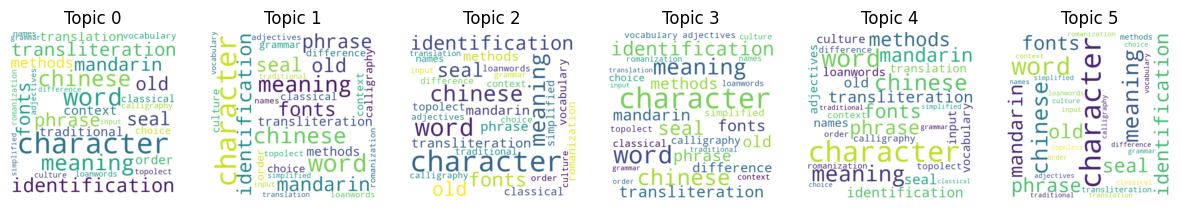

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds(lda_topic_features_df, n_features=10):
    """
    Generates a word cloud for each topic based on the top features in lda_topic_features_df.
    
    Parameters:
    lda_topic_features_df (DataFrame): DataFrame containing top features per topic.
    n_features (int): The number of top features to extract per topic for the word clouds.
    
    Returns:
    None: Displays word clouds for each topic.
    """
    # Number of topics
    n_topics = lda_topic_features_df['topic'].nunique()
    
    # Initialize the figure to display word clouds for each topic
    fig, axes = plt.subplots(1, n_topics, figsize=(15, 5))
    
    # If only one topic, make sure axes is iterable
    if n_topics == 1:
        axes = [axes]
    
    # Loop through each topic and generate a word cloud
    for topic_idx in range(n_topics):
        # Get the top words for this topic
        topic_words = lda_topic_features_df[lda_topic_features_df['topic'] == topic_idx]
        top_words = topic_words['feature'].head(n_features).values
        
        # Create a string of top words to be used in the word cloud
        text = " ".join(top_words)
        
        # Generate the word cloud
        wordcloud = WordCloud(width=500, height=500, background_color="white").generate(text)
        
        # Display the word cloud
        axes[topic_idx].imshow(wordcloud, interpolation="bilinear")
        axes[topic_idx].axis("off")
        axes[topic_idx].set_title(f"Topic {topic_idx}")
    
    plt.show()

plot_wordclouds(lda_topic_features_df, n_features=200)  


In [127]:
def print_top_30_by_topic(df, topic):
    print('Top 30 words by std for topic:', topic, '-------' * 10)
    return(df[df['topic'] == topic].head(30))

In [128]:
print_top_30_by_topic(lda_topic_features_df, 0)

Top 30 words by std for topic: 0 ----------------------------------------------------------------------


,feature,std_dev,topic
0,translation,0.448236,0
1,meaning,0.372678,0
2,word order,0.286740,0
3,order,0.286740,0
4,word,0.240380,0
5,", character",0.171730,0
6,character,0.152198,0
7,character identification,0.152198,0
8,identification,0.152198,0
9,"translation ,",0.138340,0


In [129]:
# Print the top 30 words for topic 1
print_top_30_by_topic(lda_topic_features_df, 1)

Top 30 words by std for topic: 1 ----------------------------------------------------------------------


,feature,std_dev,topic
0,word order,0.0,1
1,calligraphy,0.0,1
2,character identification,0.0,1
3,characters,0.0,1
4,"characters ,",0.0,1
5,chinese,0.0,1
6,"chinese ,",0.0,1
7,choice,0.0,1
8,classical,0.0,1
9,classical chinese,0.0,1


In [130]:
# Print the top 30 words for topic 2
print_top_30_by_topic(lda_topic_features_df, 2)

Top 30 words by std for topic: 2 ----------------------------------------------------------------------


,feature,std_dev,topic
0,characters,0.418748,2
1,topolect,0.359468,2
2,classical chinese,0.209666,2
3,classical,0.209666,2
4,chinese,0.193565,2
5,"vocabulary ,",0.179592,2
6,", topolect",0.179592,2
7,vocabulary,0.159165,2
8,simplified characters,0.154437,2
9,simplified,0.154437,2


In [131]:
# Print the top 30 words for topic 3
print_top_30_by_topic(lda_topic_features_df, 3)

Top 30 words by std for topic: 3 ----------------------------------------------------------------------


,feature,std_dev,topic
0,", difference",0.261355,3
1,difference,0.261355,3
2,"meaning ,",0.231630,3
3,meaning,0.210539,3
4,"seal ,",0.172511,3
5,"identification ,",0.172511,3
6,identification,0.152890,3
7,", calligraphy",0.152890,3
8,", seal",0.152890,3
9,calligraphy,0.152890,3


In [132]:
# Print the top 30 words for topic 4
print_top_30_by_topic(lda_topic_features_df, 4)

Top 30 words by std for topic: 4 ----------------------------------------------------------------------


,feature,std_dev,topic
0,vocabulary,0.372678,4
1,", meaning",0.203532,4
2,names,0.181297,4
3,culture,0.181297,4
4,"culture ,",0.181297,4
5,", names",0.181297,4
6,meaning,0.163958,4
7,"phrase ,",0.136499,4
8,"word ,",0.136499,4
9,", adjectives",0.136499,4


In [133]:
# Print the top 30 words for topic 5
print_top_30_by_topic(lda_topic_features_df, 5)

Top 30 words by std for topic: 5 ----------------------------------------------------------------------


,feature,std_dev,topic
0,word order,0.0,5
1,calligraphy,0.0,5
2,character identification,0.0,5
3,characters,0.0,5
4,"characters ,",0.0,5
5,chinese,0.0,5
6,"chinese ,",0.0,5
7,choice,0.0,5
8,classical,0.0,5
9,classical chinese,0.0,5


### 2.4 Apply topic modeling: assign topics

In [134]:
# Use the LDA model and assign topics to the entire dataset
# 0) word choice, phrase, sentence structure
# 1) idioms
# 2) grammar, meaning
# 3) Mandarin, character
# 4) characters, synonyms, topolects
# 5) differences: writing, speech
STACK_DF['topic_idx'] = lda_pipeline.transform(STACK_DF['topic']).argmax(axis=1)
# Map the topic numbers to the topic names
topic_map = {
    0: 'word choice, phrase, sentence structure',
    1: 'idioms',
    2: 'grammar, meaning',
    3: 'Mandarin, character',
    4: 'characters, synonyms, topolects',
    5: 'difference: writing, speech'
}
STACK_DF['topic_lda'] = STACK_DF['topic_idx'].map(topic_map)
STACK_DF.sample(10)

,text,code_switching,topic,topic_idx,topic_lda
9113,"How can I say ""I think the Eastern culture is ...",False,translation,0,"word choice, phrase, sentence structure"
1814,What are the differences between 效果 and 结果?,True,"word choice, synonyms",1,idioms
8391,Why is 的 needed in 二来是更深度的了解中国文化?,True,"grammar, word",1,idioms
5895,How do the terms in 千里之行，始于足下 modify its meaning?,True,"translation, grammar",0,"word choice, phrase, sentence structure"
5692,HSK5 - 'make / do / create' verbs (meaning of ...,True,vocabulary,4,"characters, synonyms, topolects"
8486,代表你的猴山; why can it be used in this way?,True,etymology,0,"word choice, phrase, sentence structure"
9414,which one is a better translation and seems na...,False,translation,0,"word choice, phrase, sentence structure"
10074,What exactly does 阅兵 mean/translate as?,True,"translation, meaning",4,"characters, synonyms, topolects"
4296,What are some examples of stative -le and iter...,False,"grammar, usage, mandarin, past tense",4,"characters, synonyms, topolects"
9277,Is there a dictionary of standard character va...,False,"traditional vs simplified, characters, topolect",2,"grammar, meaning"


## 3 Analyze the topic distribution: exploratory analysis

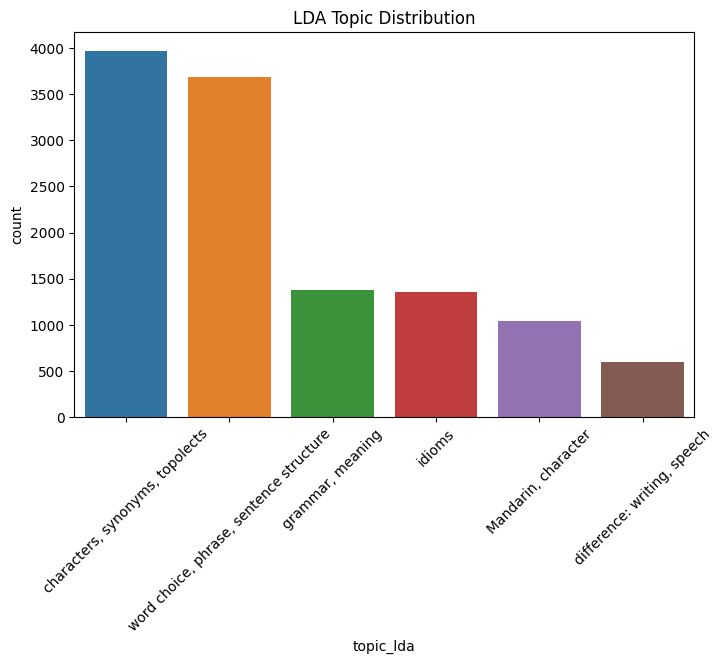

In [135]:
# Display the distribution of topics
def plot_topic_distribution(df, topic_col, title):
    """
    Plots the distribution of topics in a DataFrame.
    
    Parameters:
    df (DataFrame): The input DataFrame containing the topics.
    topic_col (str): The column name containing the topics.
    title (str): The title of the plot.
    
    Returns:
    None: This function displays a plot.
    """
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=topic_col, 
                    order=df[topic_col].value_counts().index)
    # Rotate x-labels for better readability
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

plot_topic_distribution(STACK_DF, 'topic_lda', 'LDA Topic Distribution')

In [136]:
# save the dataframe to a new csv file
STACK_DF.to_csv('private/stack_exchange_topics.csv', index=False)
print('df is saved to stack_exchange_topics.csv')

df is saved to stack_exchange_topics.csv
